<a href="https://colab.research.google.com/github/matheusrb/Credit-Card-Fraud-Prediction/blob/master/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

# Credit Card Fraud Detection

In this project, we will address the issue of credit card fraud, which is one of the main concerns for financial institutions such as banks and fintech companies. In Brazil alone, approximately 12.1 million people have fallen victim to some form of financial fraud in the last year. In terms of financial losses, these scams have surpassed the figure of R$ 1.8 billion in damages per year for the last 12 months.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Among these frauds, those involving credit cards are of great relevance since their non-detection can result in significant losses, both for the consumer and the financial institution.

Another factor to consider is the number of false positives, meaning those times when you tried to make a purchase and had your card blocked preventively - which likely caused stress and embarrassment.

For all these reasons, investment in the area of fraud detection through Artificial Intelligence is growing every year, representing a significant opportunity in Data Science.

Having large volumes of data as a historical basis, a machine learning algorithm that is just slightly better than the previous ones already represents a savings of millions of Reais. And that is the challenge, to continually improve the use of algorithms to inhibit or prevent fraudulent transactions.

In [ ]:
#Lib Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

# Data Import

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv (file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploratory Analisys

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
print("Absent values (%)")
for column in df.columns:
  print(column + ": {}%".format(df[column].isnull().sum()/df.shape[0]*100))

Absent values (%)
Time: 0.0%
V1: 0.0%
V2: 0.0%
V3: 0.0%
V4: 0.0%
V5: 0.0%
V6: 0.0%
V7: 0.0%
V8: 0.0%
V9: 0.0%
V10: 0.0%
V11: 0.0%
V12: 0.0%
V13: 0.0%
V14: 0.0%
V15: 0.0%
V16: 0.0%
V17: 0.0%
V18: 0.0%
V19: 0.0%
V20: 0.0%
V21: 0.0%
V22: 0.0%
V23: 0.0%
V24: 0.0%
V25: 0.0%
V26: 0.0%
V27: 0.0%
V28: 0.0%
Amount: 0.0%
Class: 0.0%


## Data Distribution

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='Count'>

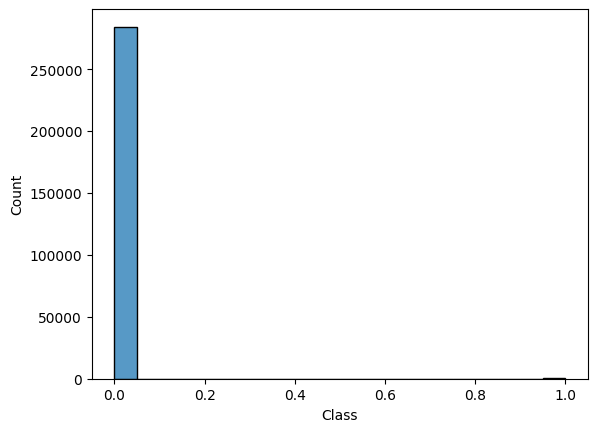

In [ ]:
#Output distribution
sns.histplot(df, x = 'Class')

A metric to evaluate the dataset is F1 score, taking into consideration the dataset's imbalance. The chosen metric follows the formula:

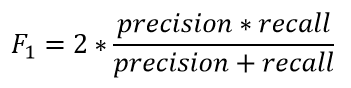

where

Precision measures the accuracy of the classifier for a specific class.

Recall measures the classifier's ability to identify a particular class.

Another option is to use data balancing methods, either by generating new output data for the minority class or randomly removing data from the majority class.

In [ ]:
#check imbalacing
from sklearn.utils.class_weight import compute_class_weight

#calculate the weight of the clases
pesos_classes = compute_class_weight('balanced', classes= df.Class.unique(), y=df.Class)
print("Classe ", df.Class.unique()[0], ": ", pesos_classes[0])
print("Classe ", df.Class.unique()[1], ": ", pesos_classes[1])

Classe  0 :  0.5008652375006595
Classe  1 :  289.4380081300813


In [ ]:
#Divideing the dataset in train and test
X = df.iloc[:,:29]
y = df.iloc[:, 30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data Set Balancing

There are two ways to deal with the imbalacing in our dataset: oversampling and undersampling.
We will try both of them and check which one is better.

### Oversampling
The oversampling involves replicating instances of the minority class to match the number of instances in the majority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X_train, y_train)

### Undersampling
Undersampling involves removing instances from the majority class to match the number of instances in the minority class.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)

## Modelling

### Decision Tree
To decide if the transaction is a fraud or not we eill use the decision tree learning algorithm. To optimize the hiperparameters the method ***gridSearch*** will be used, so it can interate over the parameters and find the better combination between them.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

#### Raw Data

In [ ]:
model = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# Define tested hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20],
    'min_samples_split': [4, 7, 10],
    'min_samples_leaf': [3, 4, 5]
}

#GritSearch object creation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# running gridsearch
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 7, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Evaluate the model using the test set
best_model_raw = grid_search.best_estimator_
accuracy = best_model_raw.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

Acurácia no conjunto de teste: 1.00


In [ ]:
print(best_model_raw)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=10, splitter='random')


In [ ]:
#Predict the model using new values
y_pred = grid_search.predict(X_test)

#F1-score
f1_raw = f1_score(y_test, y_pred)

print("F1-score:", f1_raw)

F1-score: 0.788235294117647


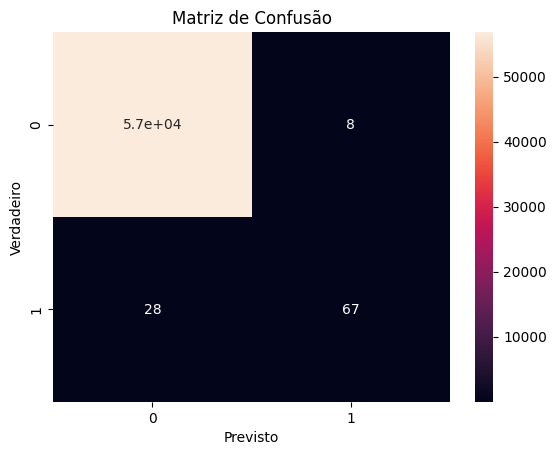

In [ ]:
#Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

#### Oversampled

In [ ]:
X_resampled_over.shape

(454896, 29)

In [ ]:
model = DecisionTreeClassifier()

#  Define tested hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20],
    'min_samples_split': [4, 7, 10],
    'min_samples_leaf': [3, 4, 5]
}

# GritSearch object creation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Running gridsearch
grid_search.fit(X_resampled_over, y_resampled_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 7, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Model accuracy on test set
best_model_over = grid_search.best_estimator_
accuracy = best_model_over.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Acurácia no conjunto de teste: 1.00


In [ ]:
print(best_model_over)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=4)


In [ ]:
#Prediction over new data
y_pred_over = grid_search.predict(X_test)

#F1-score
f1_over = f1_score(y_test, y_pred_over)

print("F1-score Over:", f1_over)

F1-score Over: 0.6504854368932039


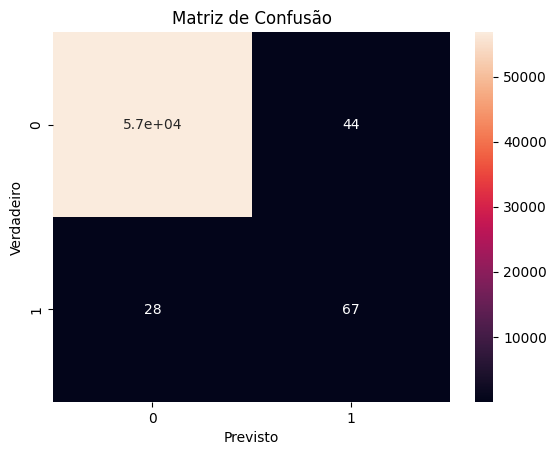

In [ ]:
# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_over), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

#### Undersampled

In [ ]:
X_resampled_under.shape

(794, 29)

In [ ]:
model = DecisionTreeClassifier()

# Define tested hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20],
    'min_samples_split': [4, 7, 10],
    'min_samples_leaf': [3, 4, 5]
}

# GritSearch object creation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Running gridsearch
grid_search.fit(X_resampled_under, y_resampled_under)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 7, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
#Model accuracy on test set
best_model_under = grid_search.best_estimator_
accuracy = best_model_under.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Acurácia no conjunto de teste: 0.93


In [ ]:
print(best_model_under)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=4, splitter='random')


In [ ]:
#Prediction over new data
y_pred_under = grid_search.predict(X_test)

#F1-score
f1_under = f1_score(y_test, y_pred_under)

print("F1-score under:", f1_under)

F1-score under: 0.039638735574510794


In [ ]:
confusion_matrix(y_test, y_pred_under)[0,1]

3812

In [ ]:
confusion_matrix(y_test, y_pred_under)[0,1]/y_test.shape[0]*100

6.6921807520803345

In [ ]:
y_test.shape[0]

56962

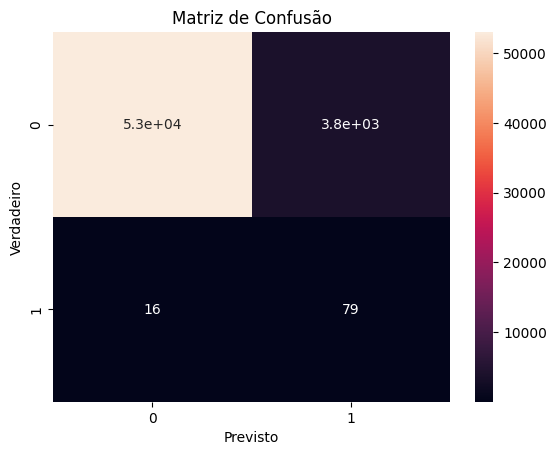

In [ ]:
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_under), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

## Conclusion


### Comparison

#### Raw Data

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56867
           1     0.8933    0.7053    0.7882        95

    accuracy                         0.9994     56962
   macro avg     0.9464    0.8526    0.8940     56962
weighted avg     0.9993    0.9994    0.9993     56962



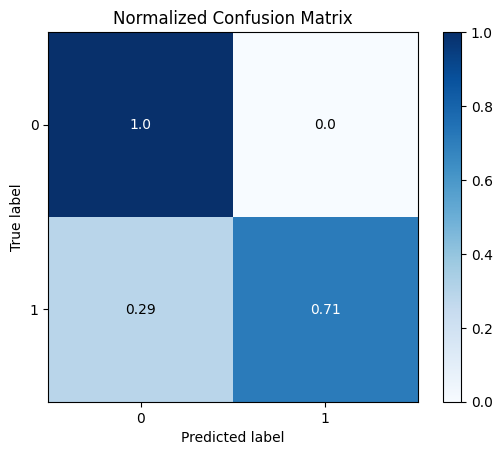

In [ ]:
# plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# prints classification report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

#### Oversampling

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9995    0.9992    0.9994     56867
           1     0.6036    0.7053    0.6505        95

    accuracy                         0.9987     56962
   macro avg     0.8016    0.8522    0.8249     56962
weighted avg     0.9988    0.9987    0.9988     56962



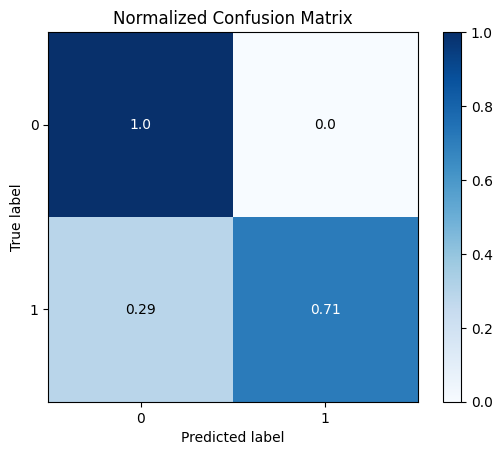

In [ ]:
# plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_over, normalize=True)

# prints classification report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_over, digits=4))

#### Undersampling

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9330    0.9652     56867
           1     0.0203    0.8316    0.0396        95

    accuracy                         0.9328     56962
   macro avg     0.5100    0.8823    0.5024     56962
weighted avg     0.9981    0.9328    0.9636     56962



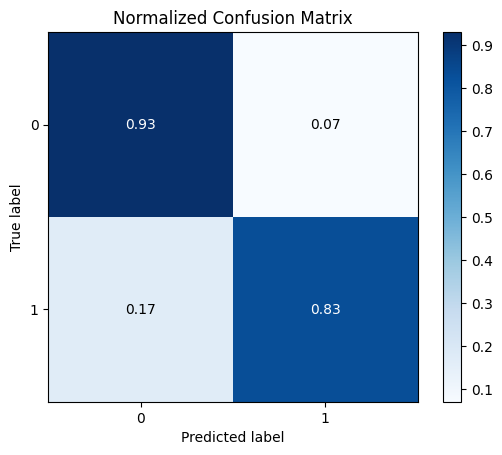

In [ ]:
# plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_under, normalize=True)

# prints classification report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_under, digits=4))

After analyzing the performance of the machine learning model in predicting credit card fraud across different data preprocessing methods, it is evident that underscaling the dataset has significantly improved the model's overall performance. However, this enhancement comes with the trade-off of falsely detecting some legitimate transactions as fraud.

The model's raw data classification report demonstrates high precision, recall, and F1-score for the majority class (non-fraudulent transactions), but the performance on the minority class (fraudulent transactions) is suboptimal. The introduction of oversampling has slightly improved the recall for the minority class but at the expense of precision, resulting in an overall decrease in model accuracy.

On the other hand, undersampling the data has remarkably increased recall for the minority class, making the model more adept at identifying fraudulent transactions. However, this has led to a decrease in precision, resulting in a higher number of false positives and a lower overall accuracy.

In light of these findings, a practical workaround to mitigate the false positive issue introduced by undersampling could involve implementing an additional step in the transaction verification process. For flagged transactions, the credit card owner could be promptly notified via a phone message, requesting confirmation for the purchase. This additional layer of verification could help prevent legitimate transactions from being falsely classified as fraud.

While the current model exhibits promising results, it is essential to acknowledge the possibility of further improvements. Exploring alternative methods and fine-tuning the model parameters may lead to enhanced performance. It is crucial to maintain a dynamic approach in adapting the model to evolving data patterns and emerging fraud tactics to ensure sustained effectiveness in credit card fraud detection.